# 概述

## 引入

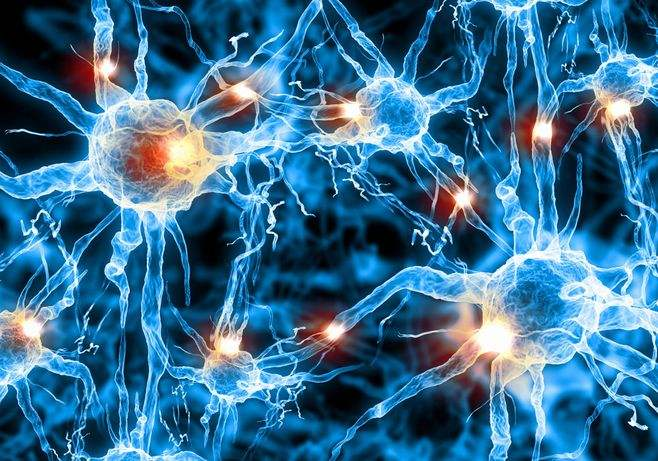
人工神经网络正是模仿了上面的网络结构。下面是一个人工神经网络的构造图。每一个圆代表着一个神经元，他们连接起来构成了一个网络。
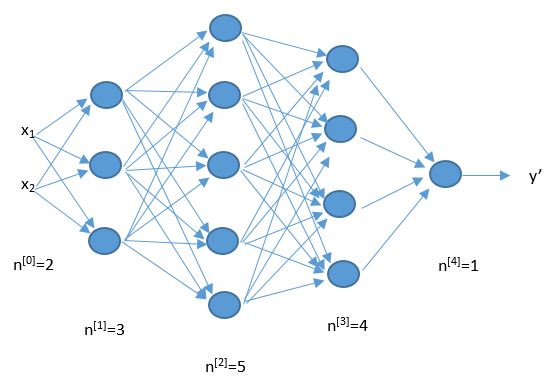

人类大脑神经元细胞的树突接收来自外部的多个强度不同的刺激，并在神经元细胞体内进行处理，然后将其转化为一个输出结果。如下图所示。
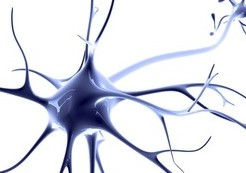
人工神经元也有相似的工作原理。如下图所示。
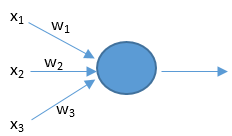
上面的x是神经元的输入，相当于树突接收的多个外部刺激。w是每个输入对应的权重，它影响着每个输入x的刺激强度。

大脑的结构越简单，那么智商就越低。单细胞生物是智商最低的了。人工神经网络也是一样的，网络越复杂它就越强大，所以我们需要深度神经网络。这里的深度是指层数多，层数越多那么构造的神经网络就越复杂。
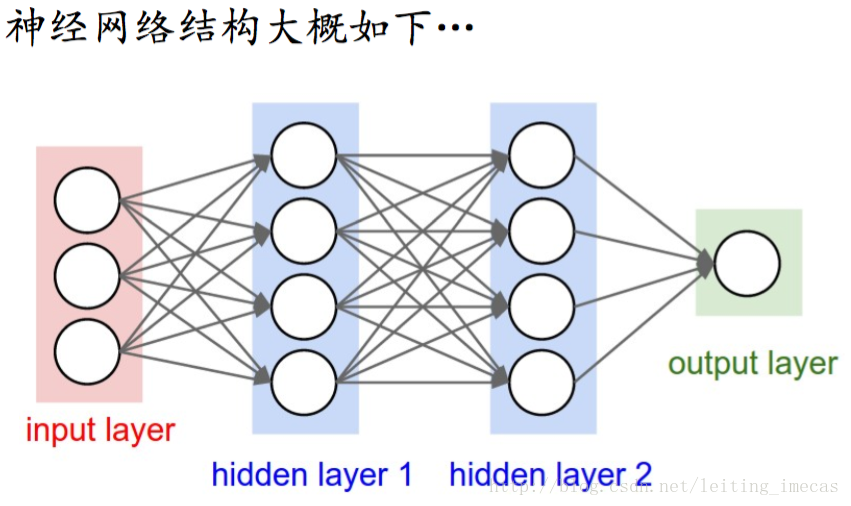

**说明：**
1. 通常一个神经网络由一个input layer，多个hidden layer和一个output layer构成。
2. 图中圆圈可以视为一个神经元（又可以称为感知器）。
3. 设计神经网络的重要工作是设计hidden layer，及神经元之间的权重。
4. 添加少量隐层获得浅层神经网络SNN；隐层很多时就是深层神经网络DNN。

## 从逻辑回归到神经元

**以一个神经元为例:**

LinearRegression模型(预测公式)： 

sigmoid函数(激活函数)： 
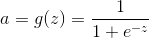
LR可以理解为如下结构： 
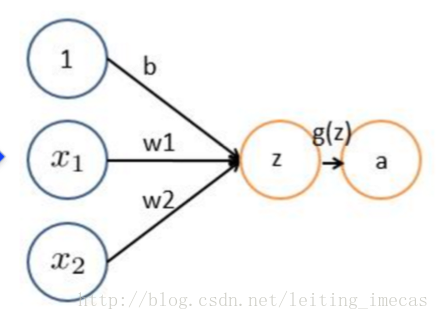
所以逻辑回归是一个单层感知器（没有隐层）结构。

**什么是激活函数?**

激活函数是一个非线性函数。用激活函数套在前面的线性函数外面，那么整个函数就变成了非线性函数了。非线性函数可以表示曲线，而且神经网络的层次越多（叠加起来的非线性函数越多）所表示的曲线就越复杂。也就是说只要神经网络的层次足够多那么就可以解决任何问题。

**总结:到此为止,我们已经可以知道可以运用逻辑回归算法进行结果预测，加入激活函数可以更好的解决问题，运用损失函数判断预测是否准确(梯度下降)**

# 前向传播与反向传播

神经网络的计算是由一个前向传播以及一个反向传播构成的。先通过前向传播计算出预测结果以及损失；然后再通过反向传播计算出损失函数关于每一个参数（w、b）的偏导数，并对这些参数进行梯度下降，然后用新的参数进行新一轮的前向传播计算，这样来回不停地进行前向传播反向传播计算来训练（更新）参数使损失函数越来越小使预测越来越精准。

## 前向传播

首先,我们假设一个函数J(a,b,c)=3(a+bc)，由前向传播计算结果如图所示:
    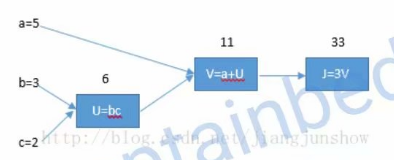

## 反向传播

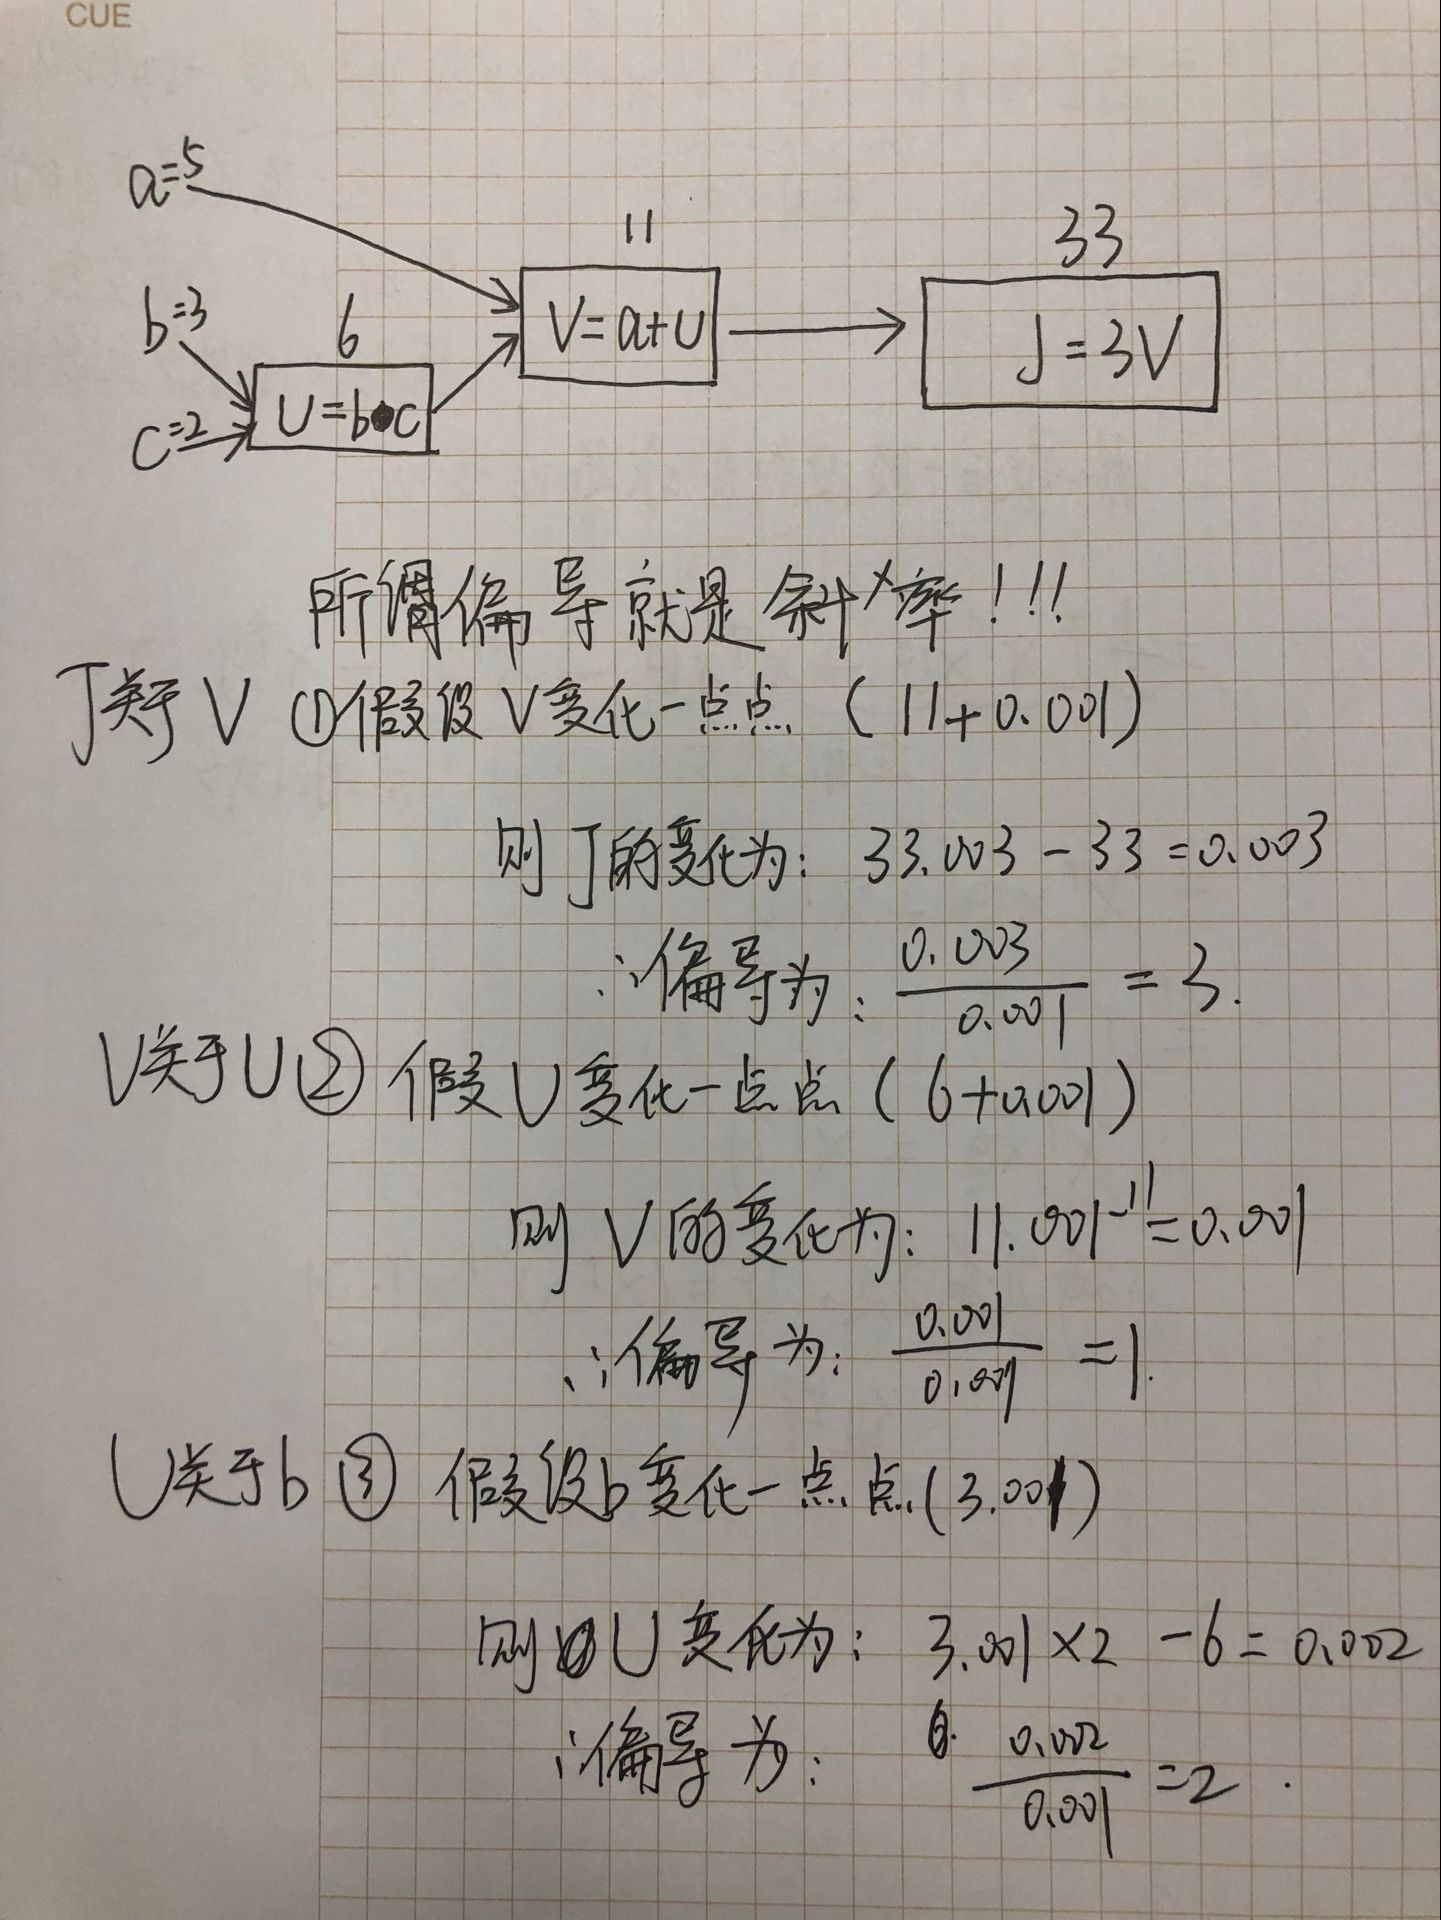

# 代码实现

In [1]:
#coding:utf-8
import random
import math

#
#   参数解释：
#   "pd_" ：偏导的前缀
#   "d_" ：导数的前缀
#   "w_ho" ：隐含层到输出层的权重系数索引
#   "w_ih" ：输入层到隐含层的权重系数的索引

class NeuralNetwork:
    LEARNING_RATE = 0.5

    def __init__(self, num_inputs, num_hidden, num_outputs, hidden_layer_weights = None, hidden_layer_bias = None, output_layer_weights = None, output_layer_bias = None):
        self.num_inputs = num_inputs

        self.hidden_layer = NeuronLayer(num_hidden, hidden_layer_bias)
        self.output_layer = NeuronLayer(num_outputs, output_layer_bias)

        self.init_weights_from_inputs_to_hidden_layer_neurons(hidden_layer_weights)
        self.init_weights_from_hidden_layer_neurons_to_output_layer_neurons(output_layer_weights)

    def init_weights_from_inputs_to_hidden_layer_neurons(self, hidden_layer_weights):
        weight_num = 0
        for h in range(len(self.hidden_layer.neurons)):
            for i in range(self.num_inputs):
                if not hidden_layer_weights:
                    self.hidden_layer.neurons[h].weights.append(random.random())
                else:
                    self.hidden_layer.neurons[h].weights.append(hidden_layer_weights[weight_num])
                weight_num += 1

    def init_weights_from_hidden_layer_neurons_to_output_layer_neurons(self, output_layer_weights):
        weight_num = 0
        for o in range(len(self.output_layer.neurons)):
            for h in range(len(self.hidden_layer.neurons)):
                if not output_layer_weights:
                    self.output_layer.neurons[o].weights.append(random.random())
                else:
                    self.output_layer.neurons[o].weights.append(output_layer_weights[weight_num])
                weight_num += 1

    def inspect(self):
        print('------')
        print('* Inputs: {}'.format(self.num_inputs))
        print('------')
        print('Hidden Layer')
        self.hidden_layer.inspect()
        print('------')
        print('* Output Layer')
        self.output_layer.inspect()
        print('------')

    def feed_forward(self, inputs):
        hidden_layer_outputs = self.hidden_layer.feed_forward(inputs)
        return self.output_layer.feed_forward(hidden_layer_outputs)

    def train(self, training_inputs, training_outputs):
        self.feed_forward(training_inputs)

        # 1. 输出神经元的值
        pd_errors_wrt_output_neuron_total_net_input = [0] * len(self.output_layer.neurons)
        for o in range(len(self.output_layer.neurons)):

            # ∂E/∂zⱼ
            pd_errors_wrt_output_neuron_total_net_input[o] = self.output_layer.neurons[o].calculate_pd_error_wrt_total_net_input(training_outputs[o])

        # 2. 隐含层神经元的值
        pd_errors_wrt_hidden_neuron_total_net_input = [0] * len(self.hidden_layer.neurons)
        for h in range(len(self.hidden_layer.neurons)):

            # dE/dyⱼ = Σ ∂E/∂zⱼ * ∂z/∂yⱼ = Σ ∂E/∂zⱼ * wᵢⱼ
            d_error_wrt_hidden_neuron_output = 0
            for o in range(len(self.output_layer.neurons)):
                d_error_wrt_hidden_neuron_output += pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].weights[h]

            # ∂E/∂zⱼ = dE/dyⱼ * ∂zⱼ/∂
            pd_errors_wrt_hidden_neuron_total_net_input[h] = d_error_wrt_hidden_neuron_output * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_input()

        # 3. 更新输出层权重系数
        for o in range(len(self.output_layer.neurons)):
            for w_ho in range(len(self.output_layer.neurons[o].weights)):

                # ∂Eⱼ/∂wᵢⱼ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢⱼ
                pd_error_wrt_weight = pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].calculate_pd_total_net_input_wrt_weight(w_ho)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.output_layer.neurons[o].weights[w_ho] -= self.LEARNING_RATE * pd_error_wrt_weight

        # 4. 更新隐含层的权重系数
        for h in range(len(self.hidden_layer.neurons)):
            for w_ih in range(len(self.hidden_layer.neurons[h].weights)):

                # ∂Eⱼ/∂wᵢ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢ
                pd_error_wrt_weight = pd_errors_wrt_hidden_neuron_total_net_input[h] * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_weight(w_ih)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.hidden_layer.neurons[h].weights[w_ih] -= self.LEARNING_RATE * pd_error_wrt_weight

    def calculate_total_error(self, training_sets):
        total_error = 0
        for t in range(len(training_sets)):
            training_inputs, training_outputs = training_sets[t]
            self.feed_forward(training_inputs)
            for o in range(len(training_outputs)):
                total_error += self.output_layer.neurons[o].calculate_error(training_outputs[o])
        return total_error

class NeuronLayer:
    def __init__(self, num_neurons, bias):

        # 同一层的神经元共享一个截距项b
        self.bias = bias if bias else random.random()

        self.neurons = []
        for i in range(num_neurons):
            self.neurons.append(Neuron(self.bias))

    def inspect(self):
        print('Neurons:', len(self.neurons))
        for n in range(len(self.neurons)):
            print(' Neuron', n)
            for w in range(len(self.neurons[n].weights)):
                print('  Weight:', self.neurons[n].weights[w])
            print('  Bias:', self.bias)

    def feed_forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.calculate_output(inputs))
        return outputs

    def get_outputs(self):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.output)
        return outputs

class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []

    def calculate_output(self, inputs):
        self.inputs = inputs
        self.output = self.squash(self.calculate_total_net_input())
        return self.output

    def calculate_total_net_input(self):
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    # 激活函数sigmoid
    def squash(self, total_net_input):
        return 1 / (1 + math.exp(-total_net_input))


    def calculate_pd_error_wrt_total_net_input(self, target_output):
        return self.calculate_pd_error_wrt_output(target_output) * self.calculate_pd_total_net_input_wrt_input();

    # 每一个神经元的误差是由平方差公式计算的
    def calculate_error(self, target_output):
        return 0.5 * (target_output - self.output) ** 2

    
    def calculate_pd_error_wrt_output(self, target_output):
        return -(target_output - self.output)

    
    def calculate_pd_total_net_input_wrt_input(self):
        return self.output * (1 - self.output)


    def calculate_pd_total_net_input_wrt_weight(self, index):
        return self.inputs[index]


# 文中的例子:

nn = NeuralNetwork(2, 2, 2, hidden_layer_weights=[0.15, 0.2, 0.25, 0.3], hidden_layer_bias=0.35, output_layer_weights=[0.4, 0.45, 0.5, 0.55], output_layer_bias=0.6)
for i in range(10000):
    nn.train([0.05, 0.1], [0.01, 0.09])
    print(i, round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.09]]]), 9))


#另外一个例子，可以把上面的例子注释掉再运行一下:

# training_sets = [
#     [[0, 0], [0]],
#     [[0, 1], [1]],
#     [[1, 0], [1]],
#     [[1, 1], [0]]
# ]

# nn = NeuralNetwork(len(training_sets[0][0]), 5, len(training_sets[0][1]))
# for i in range(10000):
#     training_inputs, training_outputs = random.choice(training_sets)
#     nn.train(training_inputs, training_outputs)
#     print(i, nn.calculate_total_error(training_sets))

0 0.496045683
1 0.483812182
2 0.471328371
3 0.458620047
4 0.445716575
5 0.432650702
6 0.41945825
7 0.406177712
8 0.392849727
9 0.379516479
10 0.366221008
11 0.353006485
12 0.339915464
13 0.326989145
14 0.314266677
15 0.301784539
16 0.289576008
17 0.277670734
18 0.266094445
19 0.254868764
20 0.244011153
21 0.233534958
22 0.223449561
23 0.213760599
24 0.204470255
25 0.195577581
26 0.18707886
27 0.178967972
28 0.171236756
29 0.163875366
30 0.156872606
31 0.150216233
32 0.143893239
33 0.137890098
34 0.13219298
35 0.126787937
36 0.12166106
37 0.116798604
38 0.112187099
39 0.107813425
40 0.103664883
41 0.099729235
42 0.095994742
43 0.092450179
44 0.089084853
45 0.085888597
46 0.082851774
47 0.079965262
48 0.077220445
49 0.074609194
50 0.072123848
51 0.0697572
52 0.067502469
53 0.065353283
54 0.063303658
55 0.061347974
56 0.059480957
57 0.057697657
58 0.055993433
59 0.054363927
60 0.052805052
61 0.051312973
62 0.049884092
63 0.048515033
64 0.047202624
65 0.045943889
66 0.044736033
67 0.043576

992 0.000591772
993 0.000590956
994 0.000590142
995 0.00058933
996 0.00058852
997 0.000587712
998 0.000586907
999 0.000586103
1000 0.000585301
1001 0.000584501
1002 0.000583703
1003 0.000582907
1004 0.000582113
1005 0.00058132
1006 0.00058053
1007 0.000579742
1008 0.000578955
1009 0.000578171
1010 0.000577388
1011 0.000576607
1012 0.000575828
1013 0.000575052
1014 0.000574276
1015 0.000573503
1016 0.000572732
1017 0.000571962
1018 0.000571195
1019 0.000570429
1020 0.000569665
1021 0.000568902
1022 0.000568142
1023 0.000567384
1024 0.000566627
1025 0.000565872
1026 0.000565119
1027 0.000564367
1028 0.000563618
1029 0.00056287
1030 0.000562124
1031 0.00056138
1032 0.000560637
1033 0.000559896
1034 0.000559157
1035 0.00055842
1036 0.000557685
1037 0.000556951
1038 0.000556219
1039 0.000555488
1040 0.00055476
1041 0.000554033
1042 0.000553307
1043 0.000552584
1044 0.000551862
1045 0.000551142
1046 0.000550423
1047 0.000549706
1048 0.000548991
1049 0.000548277
1050 0.000547566
1051 0.000546

1929 0.000239588
1930 0.000239418
1931 0.000239247
1932 0.000239077
1933 0.000238906
1934 0.000238736
1935 0.000238567
1936 0.000238397
1937 0.000238228
1938 0.000238058
1939 0.000237889
1940 0.00023772
1941 0.000237552
1942 0.000237383
1943 0.000237215
1944 0.000237047
1945 0.000236879
1946 0.000236712
1947 0.000236544
1948 0.000236377
1949 0.00023621
1950 0.000236043
1951 0.000235877
1952 0.00023571
1953 0.000235544
1954 0.000235378
1955 0.000235212
1956 0.000235046
1957 0.000234881
1958 0.000234716
1959 0.000234551
1960 0.000234386
1961 0.000234221
1962 0.000234057
1963 0.000233892
1964 0.000233728
1965 0.000233564
1966 0.0002334
1967 0.000233237
1968 0.000233074
1969 0.00023291
1970 0.000232747
1971 0.000232585
1972 0.000232422
1973 0.00023226
1974 0.000232097
1975 0.000231935
1976 0.000231774
1977 0.000231612
1978 0.00023145
1979 0.000231289
1980 0.000231128
1981 0.000230967
1982 0.000230806
1983 0.000230646
1984 0.000230486
1985 0.000230325
1986 0.000230165
1987 0.000230006
1988 

2742 0.000146371
2743 0.000146295
2744 0.000146218
2745 0.000146142
2746 0.000146066
2747 0.00014599
2748 0.000145914
2749 0.000145838
2750 0.000145762
2751 0.000145686
2752 0.000145611
2753 0.000145535
2754 0.000145459
2755 0.000145384
2756 0.000145308
2757 0.000145233
2758 0.000145158
2759 0.000145082
2760 0.000145007
2761 0.000144932
2762 0.000144857
2763 0.000144782
2764 0.000144707
2765 0.000144632
2766 0.000144557
2767 0.000144482
2768 0.000144407
2769 0.000144333
2770 0.000144258
2771 0.000144183
2772 0.000144109
2773 0.000144034
2774 0.00014396
2775 0.000143886
2776 0.000143812
2777 0.000143737
2778 0.000143663
2779 0.000143589
2780 0.000143515
2781 0.000143441
2782 0.000143367
2783 0.000143294
2784 0.00014322
2785 0.000143146
2786 0.000143072
2787 0.000142999
2788 0.000142925
2789 0.000142852
2790 0.000142778
2791 0.000142705
2792 0.000142632
2793 0.000142559
2794 0.000142485
2795 0.000142412
2796 0.000142339
2797 0.000142266
2798 0.000142193
2799 0.000142121
2800 0.000142048


3742 9.2887e-05
3743 9.285e-05
3744 9.2813e-05
3745 9.2775e-05
3746 9.2738e-05
3747 9.2701e-05
3748 9.2664e-05
3749 9.2627e-05
3750 9.259e-05
3751 9.2553e-05
3752 9.2516e-05
3753 9.2479e-05
3754 9.2442e-05
3755 9.2405e-05
3756 9.2369e-05
3757 9.2332e-05
3758 9.2295e-05
3759 9.2258e-05
3760 9.2221e-05
3761 9.2185e-05
3762 9.2148e-05
3763 9.2111e-05
3764 9.2074e-05
3765 9.2038e-05
3766 9.2001e-05
3767 9.1964e-05
3768 9.1928e-05
3769 9.1891e-05
3770 9.1855e-05
3771 9.1818e-05
3772 9.1782e-05
3773 9.1745e-05
3774 9.1709e-05
3775 9.1672e-05
3776 9.1636e-05
3777 9.16e-05
3778 9.1563e-05
3779 9.1527e-05
3780 9.149e-05
3781 9.1454e-05
3782 9.1418e-05
3783 9.1382e-05
3784 9.1345e-05
3785 9.1309e-05
3786 9.1273e-05
3787 9.1237e-05
3788 9.1201e-05
3789 9.1165e-05
3790 9.1128e-05
3791 9.1092e-05
3792 9.1056e-05
3793 9.102e-05
3794 9.0984e-05
3795 9.0948e-05
3796 9.0912e-05
3797 9.0876e-05
3798 9.084e-05
3799 9.0804e-05
3800 9.0769e-05
3801 9.0733e-05
3802 9.0697e-05
3803 9.0661e-05
3804 9.0625e-05

4628 6.716e-05
4629 6.7137e-05
4630 6.7115e-05
4631 6.7092e-05
4632 6.7069e-05
4633 6.7047e-05
4634 6.7024e-05
4635 6.7002e-05
4636 6.6979e-05
4637 6.6957e-05
4638 6.6934e-05
4639 6.6912e-05
4640 6.689e-05
4641 6.6867e-05
4642 6.6845e-05
4643 6.6822e-05
4644 6.68e-05
4645 6.6777e-05
4646 6.6755e-05
4647 6.6733e-05
4648 6.671e-05
4649 6.6688e-05
4650 6.6666e-05
4651 6.6643e-05
4652 6.6621e-05
4653 6.6599e-05
4654 6.6576e-05
4655 6.6554e-05
4656 6.6532e-05
4657 6.651e-05
4658 6.6487e-05
4659 6.6465e-05
4660 6.6443e-05
4661 6.6421e-05
4662 6.6399e-05
4663 6.6376e-05
4664 6.6354e-05
4665 6.6332e-05
4666 6.631e-05
4667 6.6288e-05
4668 6.6266e-05
4669 6.6243e-05
4670 6.6221e-05
4671 6.6199e-05
4672 6.6177e-05
4673 6.6155e-05
4674 6.6133e-05
4675 6.6111e-05
4676 6.6089e-05
4677 6.6067e-05
4678 6.6045e-05
4679 6.6023e-05
4680 6.6001e-05
4681 6.5979e-05
4682 6.5957e-05
4683 6.5935e-05
4684 6.5913e-05
4685 6.5891e-05
4686 6.5869e-05
4687 6.5847e-05
4688 6.5825e-05
4689 6.5803e-05
4690 6.5782e-05

5484 5.134e-05
5485 5.1325e-05
5486 5.131e-05
5487 5.1295e-05
5488 5.128e-05
5489 5.1264e-05
5490 5.1249e-05
5491 5.1234e-05
5492 5.1219e-05
5493 5.1204e-05
5494 5.1189e-05
5495 5.1174e-05
5496 5.1159e-05
5497 5.1144e-05
5498 5.1129e-05
5499 5.1114e-05
5500 5.1099e-05
5501 5.1084e-05
5502 5.1069e-05
5503 5.1054e-05
5504 5.104e-05
5505 5.1025e-05
5506 5.101e-05
5507 5.0995e-05
5508 5.098e-05
5509 5.0965e-05
5510 5.095e-05
5511 5.0935e-05
5512 5.092e-05
5513 5.0905e-05
5514 5.089e-05
5515 5.0875e-05
5516 5.0861e-05
5517 5.0846e-05
5518 5.0831e-05
5519 5.0816e-05
5520 5.0801e-05
5521 5.0786e-05
5522 5.0771e-05
5523 5.0757e-05
5524 5.0742e-05
5525 5.0727e-05
5526 5.0712e-05
5527 5.0697e-05
5528 5.0683e-05
5529 5.0668e-05
5530 5.0653e-05
5531 5.0638e-05
5532 5.0623e-05
5533 5.0609e-05
5534 5.0594e-05
5535 5.0579e-05
5536 5.0564e-05
5537 5.055e-05
5538 5.0535e-05
5539 5.052e-05
5540 5.0506e-05
5541 5.0491e-05
5542 5.0476e-05
5543 5.0461e-05
5544 5.0447e-05
5545 5.0432e-05
5546 5.0417e-05
554

6241 4.1562e-05
6242 4.1551e-05
6243 4.154e-05
6244 4.1529e-05
6245 4.1518e-05
6246 4.1507e-05
6247 4.1496e-05
6248 4.1485e-05
6249 4.1474e-05
6250 4.1463e-05
6251 4.1452e-05
6252 4.1441e-05
6253 4.143e-05
6254 4.1419e-05
6255 4.1408e-05
6256 4.1397e-05
6257 4.1386e-05
6258 4.1375e-05
6259 4.1364e-05
6260 4.1353e-05
6261 4.1342e-05
6262 4.1331e-05
6263 4.132e-05
6264 4.1309e-05
6265 4.1298e-05
6266 4.1287e-05
6267 4.1276e-05
6268 4.1265e-05
6269 4.1254e-05
6270 4.1243e-05
6271 4.1232e-05
6272 4.1222e-05
6273 4.1211e-05
6274 4.12e-05
6275 4.1189e-05
6276 4.1178e-05
6277 4.1167e-05
6278 4.1156e-05
6279 4.1145e-05
6280 4.1134e-05
6281 4.1124e-05
6282 4.1113e-05
6283 4.1102e-05
6284 4.1091e-05
6285 4.108e-05
6286 4.1069e-05
6287 4.1058e-05
6288 4.1048e-05
6289 4.1037e-05
6290 4.1026e-05
6291 4.1015e-05
6292 4.1004e-05
6293 4.0993e-05
6294 4.0983e-05
6295 4.0972e-05
6296 4.0961e-05
6297 4.095e-05
6298 4.0939e-05
6299 4.0928e-05
6300 4.0918e-05
6301 4.0907e-05
6302 4.0896e-05
6303 4.0885e-05

7227 3.2447e-05
7228 3.2439e-05
7229 3.2432e-05
7230 3.2424e-05
7231 3.2416e-05
7232 3.2409e-05
7233 3.2401e-05
7234 3.2393e-05
7235 3.2386e-05
7236 3.2378e-05
7237 3.237e-05
7238 3.2362e-05
7239 3.2355e-05
7240 3.2347e-05
7241 3.2339e-05
7242 3.2332e-05
7243 3.2324e-05
7244 3.2316e-05
7245 3.2309e-05
7246 3.2301e-05
7247 3.2293e-05
7248 3.2286e-05
7249 3.2278e-05
7250 3.227e-05
7251 3.2263e-05
7252 3.2255e-05
7253 3.2247e-05
7254 3.224e-05
7255 3.2232e-05
7256 3.2225e-05
7257 3.2217e-05
7258 3.2209e-05
7259 3.2202e-05
7260 3.2194e-05
7261 3.2186e-05
7262 3.2179e-05
7263 3.2171e-05
7264 3.2163e-05
7265 3.2156e-05
7266 3.2148e-05
7267 3.2141e-05
7268 3.2133e-05
7269 3.2125e-05
7270 3.2118e-05
7271 3.211e-05
7272 3.2103e-05
7273 3.2095e-05
7274 3.2087e-05
7275 3.208e-05
7276 3.2072e-05
7277 3.2065e-05
7278 3.2057e-05
7279 3.2049e-05
7280 3.2042e-05
7281 3.2034e-05
7282 3.2027e-05
7283 3.2019e-05
7284 3.2012e-05
7285 3.2004e-05
7286 3.1996e-05
7287 3.1989e-05
7288 3.1981e-05
7289 3.1974e-

8102 2.6582e-05
8103 2.6576e-05
8104 2.657e-05
8105 2.6564e-05
8106 2.6558e-05
8107 2.6553e-05
8108 2.6547e-05
8109 2.6541e-05
8110 2.6535e-05
8111 2.6529e-05
8112 2.6524e-05
8113 2.6518e-05
8114 2.6512e-05
8115 2.6506e-05
8116 2.65e-05
8117 2.6495e-05
8118 2.6489e-05
8119 2.6483e-05
8120 2.6477e-05
8121 2.6471e-05
8122 2.6466e-05
8123 2.646e-05
8124 2.6454e-05
8125 2.6448e-05
8126 2.6443e-05
8127 2.6437e-05
8128 2.6431e-05
8129 2.6425e-05
8130 2.642e-05
8131 2.6414e-05
8132 2.6408e-05
8133 2.6402e-05
8134 2.6396e-05
8135 2.6391e-05
8136 2.6385e-05
8137 2.6379e-05
8138 2.6373e-05
8139 2.6368e-05
8140 2.6362e-05
8141 2.6356e-05
8142 2.635e-05
8143 2.6345e-05
8144 2.6339e-05
8145 2.6333e-05
8146 2.6328e-05
8147 2.6322e-05
8148 2.6316e-05
8149 2.631e-05
8150 2.6305e-05
8151 2.6299e-05
8152 2.6293e-05
8153 2.6287e-05
8154 2.6282e-05
8155 2.6276e-05
8156 2.627e-05
8157 2.6265e-05
8158 2.6259e-05
8159 2.6253e-05
8160 2.6247e-05
8161 2.6242e-05
8162 2.6236e-05
8163 2.623e-05
8164 2.6225e-05
8

8990 2.2049e-05
8991 2.2044e-05
8992 2.204e-05
8993 2.2035e-05
8994 2.2031e-05
8995 2.2026e-05
8996 2.2022e-05
8997 2.2017e-05
8998 2.2013e-05
8999 2.2008e-05
9000 2.2004e-05
9001 2.2e-05
9002 2.1995e-05
9003 2.1991e-05
9004 2.1986e-05
9005 2.1982e-05
9006 2.1977e-05
9007 2.1973e-05
9008 2.1968e-05
9009 2.1964e-05
9010 2.1959e-05
9011 2.1955e-05
9012 2.1951e-05
9013 2.1946e-05
9014 2.1942e-05
9015 2.1937e-05
9016 2.1933e-05
9017 2.1928e-05
9018 2.1924e-05
9019 2.1919e-05
9020 2.1915e-05
9021 2.1911e-05
9022 2.1906e-05
9023 2.1902e-05
9024 2.1897e-05
9025 2.1893e-05
9026 2.1888e-05
9027 2.1884e-05
9028 2.188e-05
9029 2.1875e-05
9030 2.1871e-05
9031 2.1866e-05
9032 2.1862e-05
9033 2.1857e-05
9034 2.1853e-05
9035 2.1849e-05
9036 2.1844e-05
9037 2.184e-05
9038 2.1835e-05
9039 2.1831e-05
9040 2.1827e-05
9041 2.1822e-05
9042 2.1818e-05
9043 2.1813e-05
9044 2.1809e-05
9045 2.1804e-05
9046 2.18e-05
9047 2.1796e-05
9048 2.1791e-05
9049 2.1787e-05
9050 2.1782e-05
9051 2.1778e-05
9052 2.1774e-05


9974 1.8188e-05
9975 1.8185e-05
9976 1.8181e-05
9977 1.8178e-05
9978 1.8174e-05
9979 1.8171e-05
9980 1.8167e-05
9981 1.8164e-05
9982 1.8161e-05
9983 1.8157e-05
9984 1.8154e-05
9985 1.815e-05
9986 1.8147e-05
9987 1.8143e-05
9988 1.814e-05
9989 1.8137e-05
9990 1.8133e-05
9991 1.813e-05
9992 1.8126e-05
9993 1.8123e-05
9994 1.812e-05
9995 1.8116e-05
9996 1.8113e-05
9997 1.8109e-05
9998 1.8106e-05
9999 1.8102e-05


在程序运行后,误差大小越来越小